## Binary Classification of Data Points

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

In [1]:
#Given data that is to be compiled
data = [[1.5, 1.0, 1],
    [1.5, 3.0, 1],
    [3.5, 1.0, 1],
    [3.5, 3.0, 1],
    [0.5, 0.0, -1],
    [0.5, 2.0, -1],
    [2.5, 0.0, -1],
    [2.5, 2.0, -1]]

In [6]:
#Identifying different classes, two for each of the positve and negative class
class_x1 = [point[0] for point in data if point[2] == 1]
class_x2 = [point[1] for point in data if point[2] == 1]
negative_class_x1 = [point[0] for point in data if point[2] == -1]
negative_class_x2 = [point[1] for point in data if point[2] == -1]

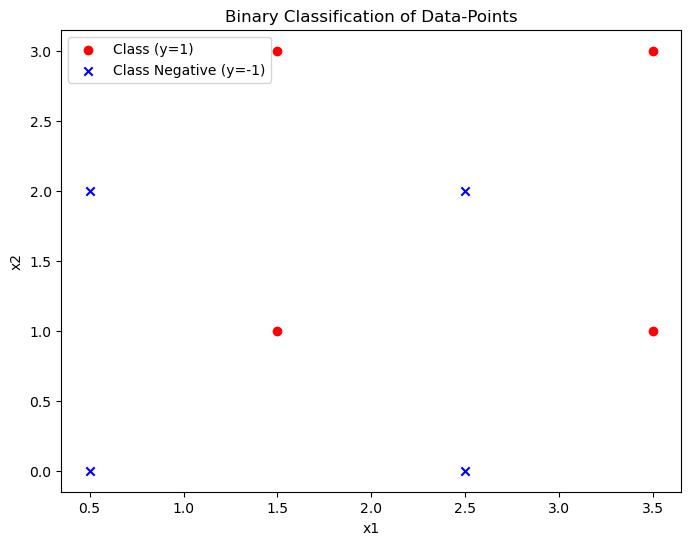

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(class_x1, class_x2, c='red', marker='o', label='Class (y=1)')
plt.scatter(negative_class_x1, negative_class_x2, c='blue', marker='x', label='Class Negative (y=-1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Binary Classification of Data-Points')
plt.legend()
plt.show()

## SVM Model with Decision Boundary and Support Vectors

In [25]:
#Defining the data set given
X = np.array([[1.5, 1.0],
    [1.5, 3.0],
    [3.5, 1.0],
    [3.5, 3.0],
    [0.5, 0.0],
    [0.5, 2.0],
    [2.5, 0.0],
    [2.5, 2.0]])

y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

In [26]:
#Training the SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(kernel='linear')

In [29]:
#Support vectors, co-efficients and decision boundaries
support_vectors = svm.support_vectors_
coefficients = svm.coef_[0]
intercept = svm.intercept_

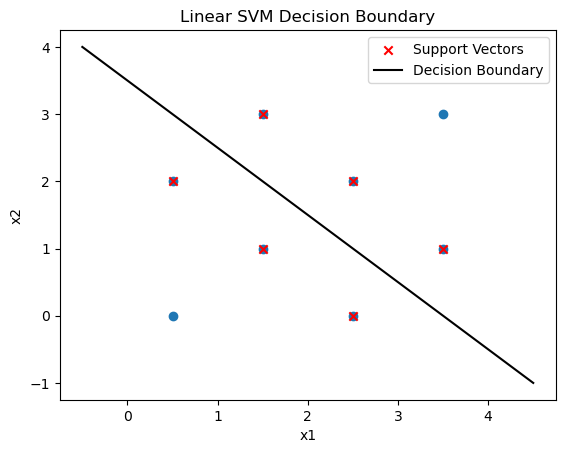

In [28]:
# Plotting decision and boundary line
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

# Define the decision boundary
x = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
y_boundary = -(coefficients[0] * x + intercept) / coefficients[1]

plt.plot(x, y_boundary, color='black', label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linear SVM Decision Boundary')
plt.legend()
plt.show()

## Linear Seperation

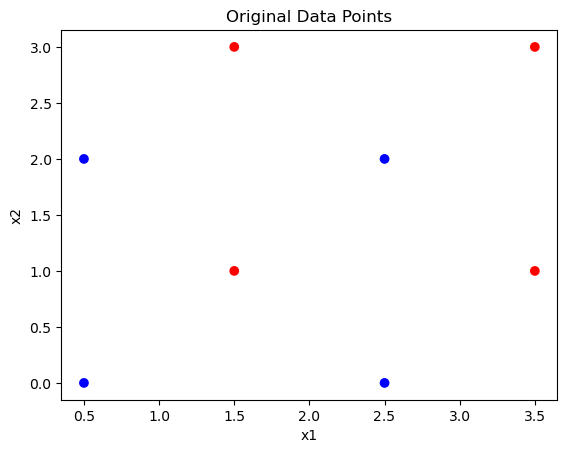

In [31]:
data = {
    'x1': [1.5, 1.5, 3.5, 3.5, 0.5, 0.5, 2.5, 2.5],
    'x2': [1.0, 3.0, 1.0, 3.0, 0.0, 2.0, 0.0, 2.0],
    'y':  [1, 1, 1, 1, -1, -1, -1, -1]
}

#Original data visualisaton which is not linearly seperable
colors = ['red' if label == 1 else 'blue' for label in data['y']]
plt.scatter(data['x1'], data['x2'], color=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Data Points')
plt.show()

### Transformation for Linear Separability

To transform the dataset into a linearly separable one, we can use polynomial features. Here we are considering quadratic transformation. 
The transformations are:

\[ z_1 = x_1^2 \]

\[ z_2 = x_2^2 \]

\[ z_3 = x_1 * x_2 \]

The new features \( z_1 \), \( z_2 \), and \( z_3 \) can be used to visualize and classify the data points where they might become linearly separable.

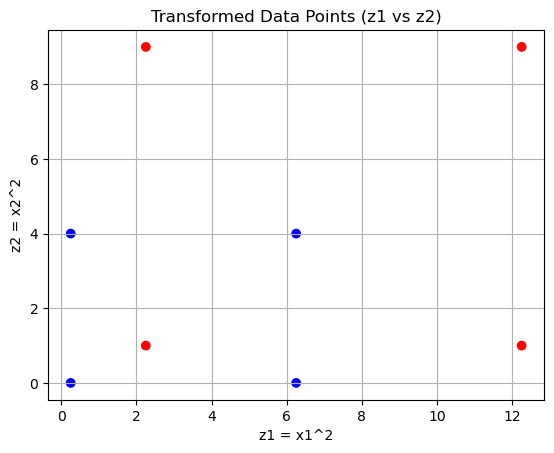

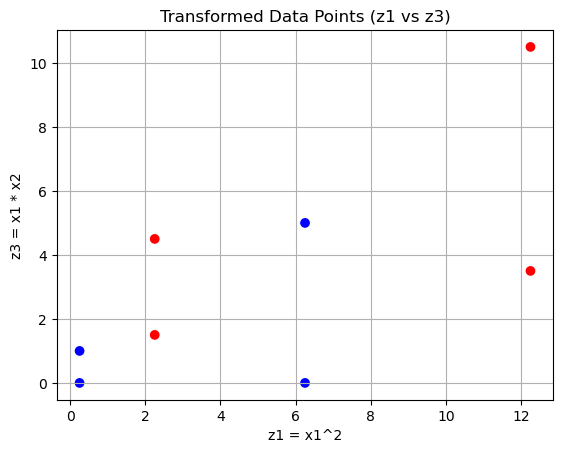

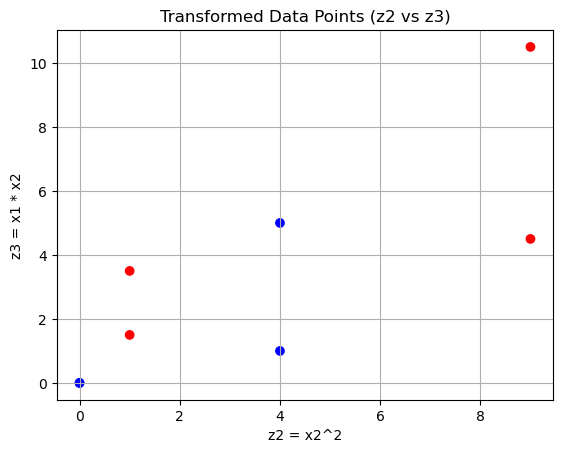

In [32]:
# Applied Transformations
z1 = np.array(data['x1']) ** 2
z2 = np.array(data['x2']) ** 2
z3 = np.array(data['x1']) * np.array(data['x2'])

# Plot transformed data
plt.scatter(z1, z2, color=colors)
plt.xlabel('z1 = x1^2')
plt.ylabel('z2 = x2^2')
plt.title('Transformed Data Points (z1 vs z2)')
plt.grid(True)
plt.show()

plt.scatter(z1, z3, color=colors)
plt.xlabel('z1 = x1^2')
plt.ylabel('z3 = x1 * x2')
plt.title('Transformed Data Points (z1 vs z3)')
plt.grid(True)
plt.show()

plt.scatter(z2, z3, color=colors)
plt.xlabel('z2 = x2^2')
plt.ylabel('z3 = x1 * x2')
plt.title('Transformed Data Points (z2 vs z3)')
plt.grid(True)
plt.show()

Since the graphs are in higher dimension it is lineraly seperable.

## Predictions on New Samples

In [33]:
new_samples = np.array([[-0.5, -1.0],
                        [-0.5, 3.0],
                        [0.5, 4.0],
                        [2.5, 4.0]])

predictions = svm.predict(new_samples)

In [34]:
for sample, prediction in zip(new_samples, predictions):
    print(f"Sample {sample} is predicted as class {prediction}")

Sample [-0.5 -1. ] is predicted as class -1
Sample [-0.5  3. ] is predicted as class -1
Sample [0.5 4. ] is predicted as class 1
Sample [2.5 4. ] is predicted as class 1


## Kernel Trick

Considering Radial Basic Function Kernel. Since dataset has non-linear relationships

#### Radial Basis Function (RBF) Kernel
The RBF kernel is defined as:

\[ K(x_i, x_j) = exp(- gamma |x_i - x_j\|^2) \]

where:
- \( K(x_i, x_j) \) is the kernel function.
- \( x_i \) and \( x_j \) are the input vectors.
- \(gamma) is a parameter that defines the width of the Gaussian function.


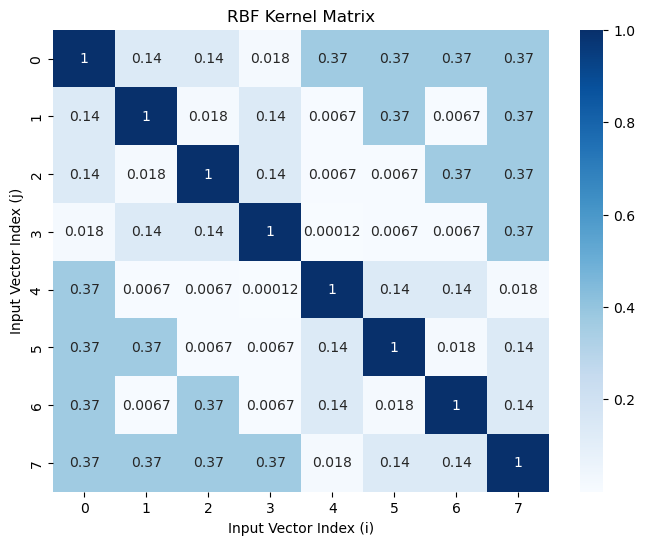

In [41]:
#Original data set
X = np.array([[1.5, 1.0],
              [1.5, 3.0],
              [3.5, 1.0],
              [3.5, 3.0],
              [0.5, 0.0],
              [0.5, 2.0],
              [2.5, 0.0],
              [2.5, 2.0]])

y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Compute the RBF kernel matrix
gamma = 0.5
kernel_matrix = rbf_kernel(X, gamma=gamma)

kernel_matrix_df = pd.DataFrame(kernel_matrix)

# Heatmap of the kernel matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kernel_matrix_df, annot=True, cmap='Blues')
plt.title('RBF Kernel Matrix')
plt.xlabel('Input Vector Index (i)')
plt.ylabel('Input Vector Index (j)')
plt.show()